# L'ensemble de Mandelbrot

Ce notebook peut également être consulté sur [nbviewer.jupyter.org](http://nbviewer.jupyter.org/url/download.tuxfamily.org/jdhp/notebook/notebook/mandelbrot.ipynb).

**TODO**
* dans la definition, ajouter le developpement sur une dizaine d'itérations de 2 ou 3 points comme exemple illustratif du calcul (ecrire z_i ou |z_i| ou les 2 ?)
* dans la definition, ajouter une representation graphique (code source caché) pour un niveau d'itération donné (ex. 50) pour avoir un exemple binaire, plus coherent avec la definition: soit un point est dans l'ensemble, soit il ne l'est pas
* tweet "Faire des maths (et du Python) en s'amusant: l'ensemble de Mandelbrot"
* à la fin du document, ajouter une section exploration ou on incite le lecteur a explorer en zoomant sur la representation graphique, en donnant des exemples illustrés et en rappelant la propriete autoreplicative a toute echelle des fractales (ne pas oublier d'introduire en rappelant que l'ens de Mandelbrot est une fractale...)

## Définition

Soit la suite $\{z_i\}$ de nombres complexes définie par

$$
z_{i+1} = z^2_i + c
$$

avec $z_0 = 0$ et avec $c \in \mathbb C$ une constante fixée.

L'ensemble de Mandelbrot est l'ensemble de tous les nombres $c$ pour lesquels cette suite converge ;
la suite tend vers l'infini pour les nombres $c$ n'appartenant pas à l'ensemble de Mandelbrot (i.e. $\lim_{i \to +\infty}{|z_i|} = +\infty$ où $|z_i|$ est le module de $z_i$).

Ci-dessous, l'ensemble de Mandelbrot est représenté graphiquement dans le plan complexe (plus la suite diverge vite plus le point est claire).

Référence: *Toutes les mathématiques et les bases de l'informatique*, H. Stöcker, Dunod, p.696

## Une implémentation Python

Note: ce script Python peut également être téléchargé [ici](https://raw.githubusercontent.com/jeremiedecock/snippets/master/python/matplotlib/mandelbrot/mandelbrot.py).

Commençons par importer les paquets requis :

In [5]:
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 8)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

Puis définissons l'ensemble de Mandelbrot par itérations successives :

In [2]:
EPSILON_MAX = 2.
NUM_IT_MAX = 32
Z_INIT = complex(0, 0)

def mandelbrot(x, y):
    it = 0
    z = Z_INIT
    c = complex(x, y)

    # Remarque: abs(z) = |z| = math.sqrt(pow(z.imag,2) + pow(z.real,2))
    while it < NUM_IT_MAX and abs(z) <= EPSILON_MAX:
        z = z**2 + c
        it += 1

    # Pour afficher tous les niveaux d'itération
    return it

    ## Pour afficher uniquement l'ensemble défini au niveau d'itération N
    #if it < N:
    #    return 1
    #else:
    #    return 0

Nous pouvons alors représenter graphiquement l'ensemble de Mandelbrot dans le plan complexe :

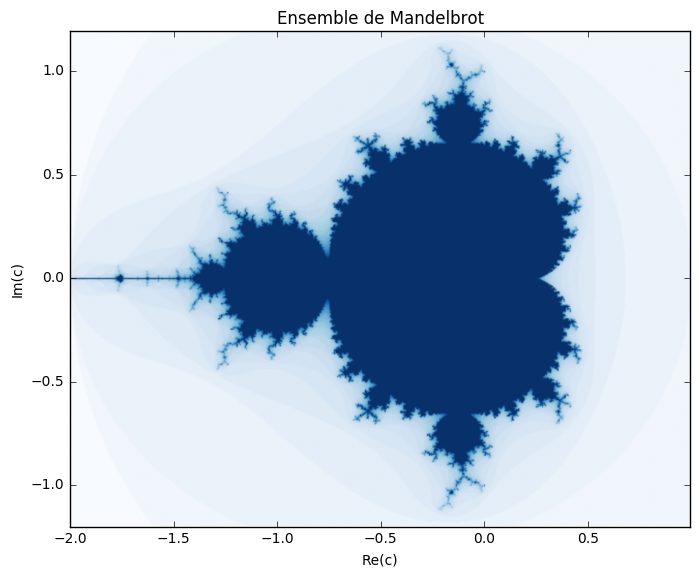

In [3]:
REAL_RANGE = np.arange(-2.0, 1.0, 0.005).tolist()
IMAG_RANGE = np.arange(-1.2, 1.2, 0.005).tolist()

# Définie un ensemble de points c et vérifie leur appartenance à l'ensemble de Mandelbrot
xgrid, ygrid = np.meshgrid(REAL_RANGE, IMAG_RANGE)
data = np.array([mandelbrot(x, y) for y in IMAG_RANGE for x in REAL_RANGE]).reshape(len(IMAG_RANGE), len(REAL_RANGE))

# Génère l'image
# (cmap alternatifs: summer, magma, gist_gray, gist_yarg, gist_heat, Blues, coolwarm, copper)
fig, ax = plt.subplots()
ax.imshow(data, extent=[xgrid.min(), xgrid.max(), ygrid.min(), ygrid.max()], interpolation="bicubic", cmap=cm.Blues)

# Ajoute un titre à l'image et nome les axes
ax.set_title("Ensemble de Mandelbrot")
ax.set_xlabel("Re(c)")
ax.set_ylabel("Im(c)")

plt.show()

Nous pouvons aussi représenter cet ensemble en 3 dimensions pour mieux mettre en évidence l'aspect itératif du processus de construction de l'ensemble de Mandelbrot.

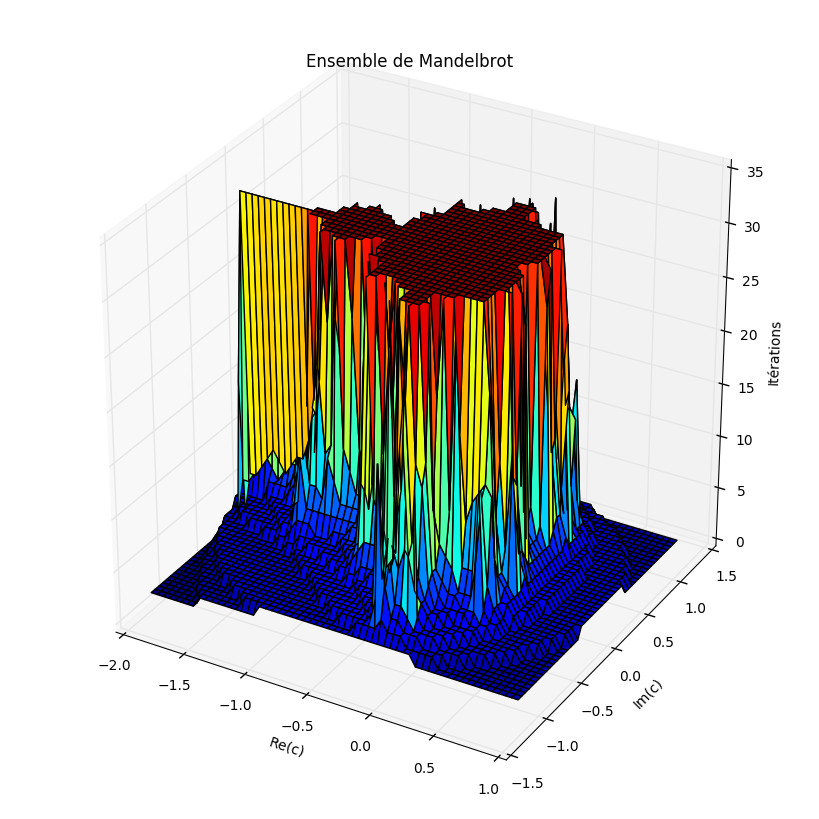

In [4]:
REAL_RANGE = np.arange(-2.0, 1.0, 0.05).tolist()
IMAG_RANGE = np.arange(-1.2, 1.2, 0.05).tolist()

# Définie un ensemble de points c et vérifie leur appartenance à l'ensemble de Mandelbrot
xgrid, ygrid = np.meshgrid(REAL_RANGE, IMAG_RANGE)
data = np.array([mandelbrot(x, y) for y in IMAG_RANGE for x in REAL_RANGE]).reshape(len(IMAG_RANGE), len(REAL_RANGE))

# Génère la figure
fig = plt.figure()
ax = axes3d.Axes3D(fig)
ax.plot_surface(xgrid, ygrid, data, cmap=cm.jet, rstride=1, cstride=1, color='b', shade=True)

# Ajoute un titre à l'image et nome les axes
plt.title("Ensemble de Mandelbrot")
ax.set_xlabel("Re(c)")
ax.set_ylabel("Im(c)")
ax.set_zlabel("Itérations")

plt.show()